In [1]:
#python >>> numpy + pandas + pyplot + seaborn 
#jupyter notebook


#analyeses skills 
#python manpulating data 
#pytghon techniques to clean the data and play with it


i had a lot of projects in programming and data science but i have choosecd this project to show how data analisis is powerful 
#this project was one of my projects to prectice the online data science classes thatb i taken on data camp 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#set some options of pd 
pd.options.display.max_columns = 1000     #toshow all the columns
pd.options.display.max_rows = 1000    #toshow all the rows
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) # to round

In [2]:
#first of all i start with colecting information about the problem that i am trying to slove in this case why police stop people 
#start to construct some initial questions 
#read the file in one chrunk since it is not too large 
df = pd.read_csv('police.csv')

In [3]:
#start looking at the data that we have which called data first date to see what i have anput them in catagoryies like 
#cop information / time information / drivier information / violation information /

#start think
#explore the head and the tail of the data to see what is going on in the data 

df.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,nan,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,nan,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,nan,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,nan,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,nan,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [4]:
df.tail()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
91736,RI,2015-12-31,21:21,nan,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,RI,2015-12-31,21:59,nan,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,RI,2015-12-31,22:04,nan,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,RI,2015-12-31,22:09,nan,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3
91740,RI,2015-12-31,22:47,nan,M,White,Registration Violation,Registration/plates,False,NaN,Citation,False,0-15 Min,False,Zone X4


In [5]:
#print the columns of the columns
print("the columns of the training are :",df.columns)
print ("the shape of the date are :",df.shape) 

#store the starting shape to see how much data did we remove after cleaning 
start_shape = df.shape

the columns of the training are : Index(['state', 'stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop', 'district'],
      dtype='object')
the shape of the date are : (91741, 15)


In [6]:
#what we have here is 15 columns and 91741 rows almost of them
#are objects (strings24) ,2int and 3float exept citition_issued or no and the vecail _ year it is foalt and this is wired
#raw_row column is int an it is the same as the index but it is starting counting from 1 instead of 0
# we need to see how we will deal with the date and time columns ,we can devide our data to 3 catagories 

#cop(name,id)
#citation(stop_date,stop_time,)
#subject(driver_gender,driver_race)
#violation(violation,violation_raw.citiation,stop_outcome)
#Search(search_conducted,search_type)
#MoreInfo(is_arrested,drugs_related_stop)
#location (state,,district,county_name)
#Car(car_color,Brand,year)
#cop(name,id)
#some other inforamation :dtata is a lttle bit light 9.3 MB


# we have 12 objects ,1 float ,2 bool 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
state                 91741 non-null object
stop_date             91741 non-null object
stop_time             91741 non-null object
county_name           0 non-null float64
driver_gender         86536 non-null object
driver_race           86539 non-null object
violation_raw         86539 non-null object
violation             86539 non-null object
search_conducted      91741 non-null bool
search_type           3307 non-null object
stop_outcome          86539 non-null object
is_arrested           86539 non-null object
stop_duration         86539 non-null object
drugs_related_stop    91741 non-null bool
district              91741 non-null object
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+ MB


In [6]:
#construct more questions 
#convert any infinty value to nan
df = df.replace([np.inf, -np.inf], np.nan)

#start cleaning data process 
    #-looking for missing data ---> handal this information (remove or replace)
    
    

state                     0
stop_date                 0
stop_time                 0
search_conducted          0
drugs_related_stop        0
district                  0
driver_race            5202
violation_raw          5202
violation              5202
stop_outcome           5202
is_arrested            5202
stop_duration          5202
driver_gender          5205
search_type           88434
county_name           91741
dtype: int64


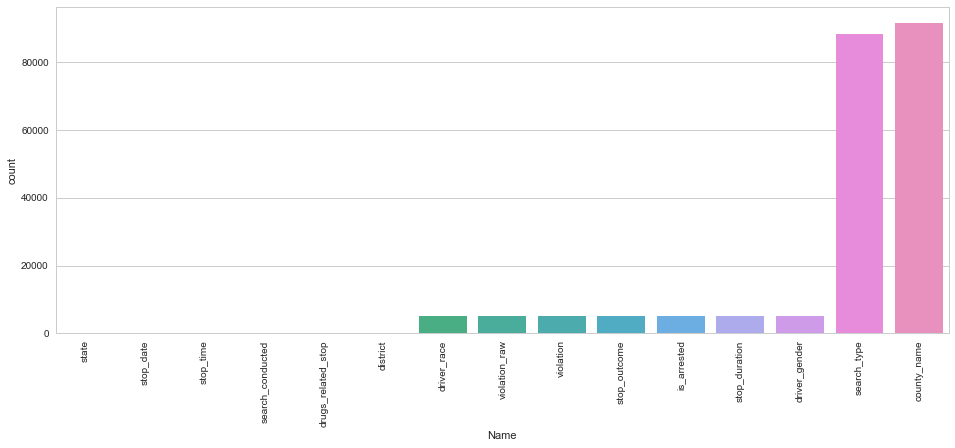

In [8]:
#check the null data points how many null do we have 
miss = df.isnull().sum().sort_values()
print(miss)
#frame of the missing data vount/name
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index


#plot the missing value count
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(16, 6))
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation = 90)
plt.show()


#so the most missing data is in 2 columns county_name so we can simply drop them , 
#for search_type we can consider them for now that it is null once there is no search happen 

# we can drop the rows from the others because these values is very important in the analisis 

In [7]:
#also lets check if the data is coming from one state or diffrent states if from one state so we can simply drop the state col 
print (df.state.unique())
#so sice is the same state RI so drop this column too
df.drop(['state','county_name'],axis=1,inplace=True)


['RI']


In [8]:
#drop the nan rows:
df.dropna(subset=['driver_race','violation_raw','violation','stop_outcome','stop_duration','is_arrested','driver_gender'],inplace=True)


In [9]:
#after we droped the columnsso now we should deal the other nan values by create a dictionary
miss = df.isnull().sum().sort_values()
print(miss)


stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
search_type           83229
dtype: int64


In [10]:
#look at search_type and see if that because the there is no seach or this missing data
print(df.search_conducted.unique())
df[df.search_type.isna() == True].groupby('search_conducted').count()

# so what we will do is just fill these rows with 'nosearch'

[False  True]


,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
search_conducted,,,,,,,,,,,,
False,83229,83229,83229,83229,83229,83229,0,83229,83229,83229,83229,83229


In [11]:
df['search_type'] =  df['search_type'].fillna('nosearch')
print(df.search_conducted.value_counts())
print(df.search_type.value_counts())

False    83229
True      3307
Name: search_conducted, dtype: int64
nosearch                                                    83229
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Probable Cause,Protective Frisk                                35
Incident to Arrest,Inventory,Probable Cause                    35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident 

In [12]:
#after fixing the missing and nanrows now we should deal with types:
#1-deal with date and tim =====> combine them togather and convert to datetime type
df.isnull().sum().sort_values()

stop_date             0
stop_time             0
driver_gender         0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
search_type           0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
district              0
dtype: int64

In [13]:
#now start comibe the data and time and use them as unique index for the data set 
df['stop_date']=df.stop_date.str.replace('/','-')
df['date_time'] = df.stop_date.str.cat(df.stop_time,sep=' ')
#convert to data time 
df['date_time']  = pd.to_datetime(df['date_time'])
#drop these columns 
#citation_issued is true for all cititation so all the outcome is ended up with citation  
#df.drop(['stop_date','stop_time'],axis=1,inplace=True)

In [14]:
print(df.head())

    stop_date stop_time driver_gender driver_race  \
0  2005-01-04     12:55             M       White   
1  2005-01-23     23:15             M       White   
2  2005-02-17     04:15             M       White   
3  2005-02-20     17:15             M       White   
4  2005-02-24     01:20             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False    nosearch   
1                        Speeding   Speeding             False    nosearch   
2                        Speeding   Speeding             False    nosearch   
3                Call for Service      Other             False    nosearch   
4                        Speeding   Speeding             False    nosearch   

    stop_outcome is_arrested stop_duration  drugs_related_stop district  \
0       Citation       False      0-15 Min               False  Zone X4   
1       Citation       False      0-15 Min               False

In [15]:
df.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
district                      object
date_time             datetime64[ns]
dtype: object

In [18]:
#set the index to date_time 
df.set_index('date_time',inplace=True)

In [19]:
print(df.head())

                      stop_date stop_time driver_gender driver_race  \
date_time                                                             
2005-01-04 12:55:00  2005-01-04     12:55             M       White   
2005-01-23 23:15:00  2005-01-23     23:15             M       White   
2005-02-17 04:15:00  2005-02-17     04:15             M       White   
2005-02-20 17:15:00  2005-02-20     17:15             M       White   
2005-02-24 01:20:00  2005-02-24     01:20             F       White   

                                      violation_raw  violation  \
date_time                                                        
2005-01-04 12:55:00  Equipment/Inspection Violation  Equipment   
2005-01-23 23:15:00                        Speeding   Speeding   
2005-02-17 04:15:00                        Speeding   Speeding   
2005-02-20 17:15:00                Call for Service      Other   
2005-02-24 01:20:00                        Speeding   Speeding   

                     search_conducted s

In [16]:
df.describe()
#for drivier gender the---> 62762 M --> 62762 
# drivier race         ---> White 61870 --> 5 races need more investigation
# violation_raw        ---> Speeding 48423 ---> 12 violation_raw
# violation            ---> Speeding 48423 --> 6 
# search_conducted     ---> False: 83229  
# search_type          ---> nosearch:83229	 ---> 26
# stop_outcome         ---> Citation:77091 --->6
# is_arrested          ---> False:83458
# stop_duration        ---> stop_duration --> 0-15 Min --> 69577
# drugs_related_stop   ---> drugs_related_stop 85674
# district             ---> 6 --> Zone X4 ---> 22503
#Stop_date             --->2007-05-16 was the most stoped day 63 stop
#stop_time             ---> 11 am is the 339

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,date_time
count,86536,86536,86536,86536,86536,86536,86536,86536,86536,86536,86536,86536,86536,86536
unique,3754,1424,2,5,12,6,2,26,6,2,3,2,6,84429
top,2007-05-16,11:00,M,White,Speeding,Speeding,False,nosearch,Citation,False,0-15 Min,False,Zone X4,2015-01-10 09:11:00
freq,63,339,62762,61870,48423,48423,83229,83229,77091,83458,69577,85674,22503,8
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-01-04 12:55:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31 22:47:00


In [17]:
def show_graph(var,name):
    print(var)
    sns.set(style="darkgrid")
    sns.barplot(var.index, var.values, alpha=0.9)
    plt.title('Frequency Distribution of ' + name)
    plt.ylabel('Number of viloation', fontsize=5)
    plt.xlabel(name, fontsize=5)
    plt.xticks(rotation=45)
    plt.show()

White      71.496
Black      14.196
Hispanic   11.240
Asian       2.761
Other       0.306
Name: driver_race, dtype: float64


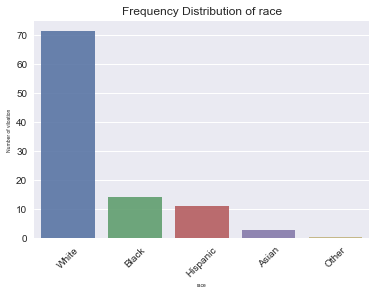

In [18]:
#start with single features race and put the population of the distract in considration
race = df.driver_race.value_counts(normalize=1) * 100
show_graph(race,'race')
#white    --> 71.49%
#Black    --> 14.196%
#Hispanic --> 11.240%
#Asian    --> 2.761%
#start #Other    --> 0.306%

M   72.527
F   27.473
Name: driver_gender, dtype: float64


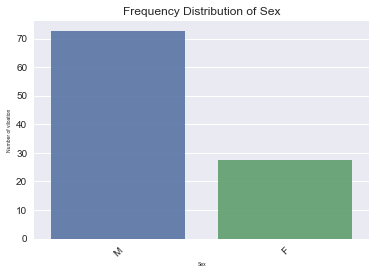

In [23]:
# start looking at the gender 
sex = df.driver_gender.value_counts(normalize=1) *100
show_graph(sex,'Sex')

#Male   : 72.527%
#Female : 27.473%

Speeding                           55.957
Other Traffic Violation            18.748
Equipment/Inspection Violation     12.620
Registration Violation              4.279
Seatbelt Violation                  3.300
Special Detail/Directed Patrol      2.851
Call for Service                    1.607
Motorist Assist/Courtesy            0.237
Violation of City/Town Ordinance    0.209
APB                                 0.105
Suspicious Person                   0.065
Warrant                             0.021
Name: violation_raw, dtype: float64


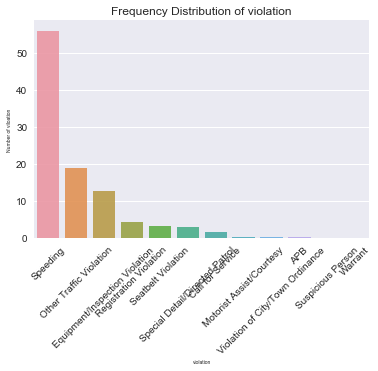

In [24]:
#violation
violation = df.violation_raw.value_counts(normalize=1) * 100
show_graph(violation,'violation')
#Speeding --> 55.957
#Other Traffic Violation  --> 18.748
#Equipment/Inspection Violation     12.620
#Registration Violation              4.279
#Seatbelt Violation                  3.300
#Special Detail/Directed Patrol      2.851
#Call for Service                    1.607
#Motorist Assist/Courtesy            0.237
#Violation of City/Town Ordinance    0.209
#APB                                 0.105
#Suspicious Person                   0.065
#Warrant                             0.021

Speeding                           55.957
Other Traffic Violation            18.748
Equipment/Inspection Violation     12.620
Registration Violation              4.279
Seatbelt Violation                  3.300
Special Detail/Directed Patrol      2.851
Call for Service                    1.607
Motorist Assist/Courtesy            0.237
Violation of City/Town Ordinance    0.209
APB                                 0.105
Suspicious Person                   0.065
Warrant                             0.021
Name: violation_raw, dtype: float64


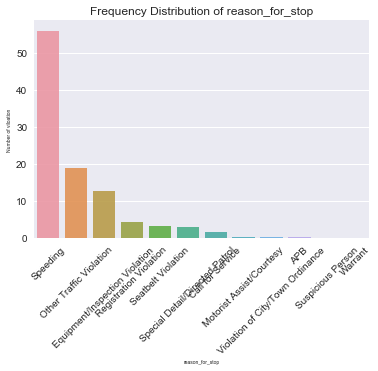

In [26]:
reason_for_stop = df.violation_raw.value_counts(normalize=1) * 100

show_graph(reason_for_stop,'reason_for_stop')

Zone X4   26.004
Zone K3   22.603
Zone K2   20.410
Zone X3   18.690
Zone K1    9.587
Zone X1    2.705
Name: district, dtype: float64


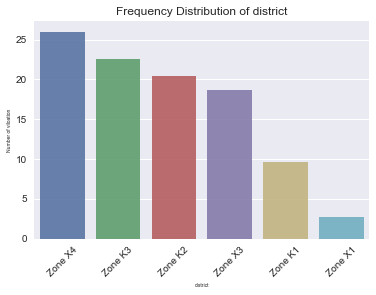

In [25]:
#the distrect or coutries of the stops ---> consider the popluation 
district = df.district.value_counts(normalize=1) * 100
show_graph(district,'district')
# almost district close tp each others ----> X4 ,K3 , K2, X3 ,K1 ,X1
# for farther investigation  

In [66]:

arrest_made = df.is_arrested.value_counts()
print(arrest_made)

False    83458
True      3078
Name: is_arrested, dtype: int64


In [19]:
#the precentage% of arristed is very clsoe in X4 is the highest 
#also the number of arrested is very high is the zone X4 and this is locally true since the highest citation is in zone X4
#then start look at the compination of the features 
#arrest rate per disstrect
arrist_rate = df.groupby('district').is_arrested.sum()
dist_rate   = df.district.value_counts()
result      = pd.concat([arrist_rate, dist_rate], axis=1, join='inner')
result['presentage'] = result['is_arrested'] / result['district']
print(result.sort_values('presentage'))



         is_arrested  district  presentage
Zone X1           55      2341       0.023
Zone K1          202      8296       0.024
Zone K2          544     17662       0.031
Zone K3          632     19560       0.032
Zone X3          564     16174       0.035
Zone X4         1081     22503       0.048


In [28]:
#arrest by gender
gender_rate = df.groupby('driver_gender').is_arrested.sum()
g_rate      = df.driver_gender.value_counts()
result      = pd.concat([gender_rate, g_rate], axis=1, join='inner')
result['percentage'] = (result.is_arrested / result.driver_gender) * 100
print(result)

#the of the female arrested is lawer than the male 
#the number of the arrested is by far male than the female 

   is_arrested  driver_gender  percentage
F          669          23774       2.814
M         2409          62762       3.838


Citation           89.085
Warning             5.935
Arrest Driver       3.161
No Action           0.721
N/D                 0.701
Arrest Passenger    0.396
Name: stop_outcome, dtype: float64


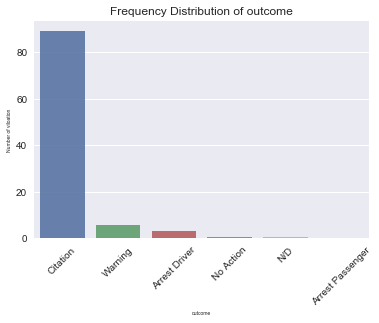

In [43]:
#out come 
outcome= df.stop_outcome.value_counts(normalize=True)*100
show_graph(outcome,'outcome')

In [21]:
#arret by race
arrest_race = df.groupby('driver_race').is_arrested.sum()
r_rate      = df.driver_race.value_counts()
result      = pd.concat([arrest_race, r_rate], axis=1, join='inner')
result['percentage'] = (result.is_arrested / result.driver_race) * 100
print(result)

#the precentage of the black arrested is by far more also the hispanic 
#the number of arrested is by far more 

          is_arrested  driver_race  percentage
Asian              46         2389       1.925
Black             769        12285       6.260
Hispanic          605         9727       6.220
Other               2          265       0.755
White            1656        61870       2.677


In [23]:
# drug by gender
drug_gender = df.groupby('driver_gender').drugs_related_stop.sum()
g_rate      = df.driver_gender.value_counts()
result      = pd.concat([drug_gender, g_rate], axis=1, join='inner')
result['percentage'] = (result.drugs_related_stop / result.driver_gender) * 100
print(result)

   drugs_related_stop  driver_gender  percentage
F             107.000          23774       0.450
M             755.000          62762       1.203


In [25]:
#drug by race
drug_gender = df.groupby('driver_race').drugs_related_stop.sum()
g_rate      = df.driver_race.value_counts()
result      = pd.concat([drug_gender, g_rate], axis=1, join='inner')
result['percentage'] = (result.drugs_related_stop / result.driver_race) * 100
print(result)

          drugs_related_stop  driver_race  percentage
Asian                 13.000         2389       0.544
Black                221.000        12285       1.799
Hispanic             131.000         9727       1.347
Other                  1.000          265       0.377
White                496.000        61870       0.802


In [26]:
#drug by zone 
drug_gender = df.groupby('district').drugs_related_stop.sum()
g_rate      = df.district.value_counts()
result      = pd.concat([drug_gender, g_rate], axis=1, join='inner')
result['percentage'] = (result.drugs_related_stop / result.district) * 100
print(result)

         drugs_related_stop  district  percentage
Zone K1              77.000      8296       0.928
Zone K2             118.000     17662       0.668
Zone K3             253.000     19560       1.293
Zone X1               5.000      2341       0.214
Zone X3              82.000     16174       0.507
Zone X4             327.000     22503       1.453


In [31]:
#arrested by race because of the druges 
d1 = drug_data.groupby('driver_race').is_arrested.sum()
#so for drug arristed for drucges 143 white/63 black 
d2 = df.groupby('driver_race').drugs_related_stop.sum()
re= pd.concat([d1,d2],axis=1,join='inner')
re['arrist_rate'] = re['is_arrested'] /re['drugs_related_stop']

#arrest for driges is higest for white also the number of people who arrested and who stoped for druges 
print(re)

            is_arrested  drugs_related_stop arrist_rate
driver_race                                            
Asian                 2              13.000       0.154
Black                63             221.000       0.285
Hispanic             25             131.000       0.191
Other             False               1.000       0.000
White               143             496.000       0.288


In [39]:
#arrested by gender because of the druges 
d1 = drug_data.groupby('driver_gender').is_arrested.sum()
#so for drug arristed for drucges 143 white/63 black 
d2 = df.groupby('driver_gender').drugs_related_stop.sum()
re= pd.concat([d1,d2],axis=1,join='inner')
re['arrist_rate'] = re['is_arrested'] /re['drugs_related_stop']

#arrest for driges is higest for white also the number of people who arrested and who stoped for druges 
print(re)

               is_arrested  drugs_related_stop  arrist_rate
driver_gender                                              
F                       31             107.000        0.290
M                      202             755.000        0.268


In [30]:
df.violation.value_counts().sort_values(ascending = False)
#speeding is by far most frequant sppeding 

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

In [31]:
df[df.violation == 'Other'].violation_raw.value_counts().sort_values()
#speeding is by far most frequant sppeding 
#violation frequancy

Warrant                               18
Suspicious Person                     56
APB                                   91
Violation of City/Town Ordinance     181
Motorist Assist/Courtesy             205
Call for Service                    1391
Special Detail/Directed Patrol      2467
Name: violation_raw, dtype: int64

In [32]:
#race by violation
result = pd.crosstab(df.violation,df.driver_race)
print(result)
#the speeding -->38325

driver_race          Asian  Black  Hispanic  Other  White
violation                                                
Equipment              219   2153      2168     14   6367
Moving violation       318   2940      2381     58  10527
Other                  111    817       625     13   2843
Registration/plates     69    869       776      9   1980
Seat belt               52    456       516      4   1828
Speeding              1620   5050      3261    167  38325


In [33]:
#violation by gender 
result = pd.crosstab(df.violation,df.driver_gender)
print(result)
sex = df.driver_gender.value_counts() 
print((result/ sex) *100)


driver_gender            F      M
violation                        
Equipment             2501   8420
Moving violation      3286  12938
Other                  707   3702
Registration/plates   1056   2647
Seat belt              578   2278
Speeding             15646  32777
                         F      M
violation                        
Equipment           10.520 13.416
Moving violation    13.822 20.614
Other                2.974  5.898
Registration/plates  4.442  4.218
Seat belt            2.431  3.630
Speeding            65.811 52.224


In [38]:
#arrest because speeding by race presentage
d2 = df[df.violation == 'Speeding'].groupby('driver_race').is_arrested.sum()
d1          = df.driver_race.value_counts()
result      = pd.concat([d2, d1], axis=1, join='inner')
result['percentage'] = (result.is_arrested / result.driver_race) * 100
print(result)
#arrest for driges is higest for white also the number of people who arrested and who stoped for druges 
#print(d2)

          is_arrested  driver_race  percentage
Asian              11         2389       0.460
Black             151        12285       1.229
Hispanic          101         9727       1.038
Other               0          265       0.000
White             400        61870       0.647


In [36]:
#stop outcome by race 
result = pd.crosstab(df.stop_outcome,df.driver_race)
print(result)
race = df.driver_race.value_counts() 
print((result/ race) *100)
# we can get a lot of information from here :


driver_race       Asian  Black  Hispanic  Other  White
stop_outcome                                          
Arrest Driver        42    667       538      2   1486
Arrest Passenger      4    102        67      0    170
Citation           2205  10531      8288    244  55823
N/D                  10    105        92      2    398
No Action            20     80        86      3    435
Warning             108    800       656     14   3558
                  Asian  Black  Hispanic  Other  White
stop_outcome                                          
Arrest Driver     1.758  5.429     5.531  0.755  2.402
Arrest Passenger  0.167  0.830     0.689  0.000  0.275
Citation         92.298 85.722    85.206 92.075 90.226
N/D               0.419  0.855     0.946  0.755  0.643
No Action         0.837  0.651     0.884  1.132  0.703
Warning           4.521  6.512     6.744  5.283  5.751


In [40]:
#stop out come by gender 
result = pd.crosstab(df.stop_outcome,df.driver_gender)
print(result)
race = df.driver_gender.value_counts() 
print((result/ race) *100)
# we can get a lot of information from here :

driver_gender         F      M
stop_outcome                  
Arrest Driver       556   2179
Arrest Passenger    113    230
Citation          21251  55840
N/D                 168    439
No Action           201    423
Warning            1485   3651
                      F      M
stop_outcome                  
Arrest Driver     2.339  3.472
Arrest Passenger  0.475  0.366
Citation         89.388 88.971
N/D               0.707  0.699
No Action         0.845  0.674
Warning           6.246  5.817


In [41]:
#stop outcome by zones 
result = pd.crosstab(df.stop_outcome,df.district)
print(result)
race = df.district.value_counts() 
print((result/ race) *100)
# we can get a lot of information from here :

district          Zone K1  Zone K2  Zone K3  Zone X1  Zone X3  Zone X4
stop_outcome                                                          
Arrest Driver         180      513      562       48      473      959
Arrest Passenger       22       31       70        7       91      122
Citation             7506    15812    17154     2146    14495    19978
N/D                   104       64      148       20       32      239
No Action              50       55      126       15      179      199
Warning               434     1187     1500      105      904     1006
                  Zone K1  Zone K2  Zone K3  Zone X1  Zone X3  Zone X4
stop_outcome                                                          
Arrest Driver       2.170    2.905    2.873    2.050    2.924    4.262
Arrest Passenger    0.265    0.176    0.358    0.299    0.563    0.542
Citation           90.477   89.526   87.699   91.670   89.619   88.779
N/D                 1.254    0.362    0.757    0.854    0.198    1.062
No Act

In [43]:
#stop because of the druges and arrested after search by  race
d1 = df.groupby('driver_race').search_conducted.sum()
#so for drug arristed for drucges 143 white/63 black 
d2 = df.groupby('driver_race').drugs_related_stop.sum()
d3 = df.groupby('driver_race').is_arrested.sum()
re= pd.concat([d1,d2,d3],axis=1,join='inner')
re['search_drug'] = ( re.drugs_related_stop / re.search_conducted) * 100
re['arrest_search'] = (re.is_arrested / re.search_conducted ) * 100
#!00% of search related to drug
print(re)

             search_conducted  drugs_related_stop  is_arrested  search_drug  \
driver_race                                                                   
Asian                  49.000              13.000           46       26.531   
Black                 823.000             221.000          769       26.853   
Hispanic              598.000             131.000          605       21.906   
Other                   3.000               1.000            2       33.333   
White                1834.000             496.000         1656       27.045   

             arrest_search  
driver_race                 
Asian               93.878  
Black               93.439  
Hispanic           101.171  
Other               66.667  
White               90.294  


In [65]:
d2= df[(df.drugs_related_stop == True) & (df.is_arrested == True)]
re = d2.groupby('driver_race').sum()
#so for drug arristed for drucges 143 white/63 black 
#d2 = df.groupby('driver_gender').drugs_related_stop.sum()
#d3 = df.groupby('driver_gender').is_arrested.sum()
#re= pd.concat([d1,d2,d3],axis=1,join='inner')

#!00% of search related to drug
print(re)

             search_conducted  drugs_related_stop
driver_race                                      
Asian                   2.000               2.000
Black                  63.000              63.000
Hispanic               25.000              25.000
White                 143.000             143.000


In [39]:
d1 = df.groupby('district').search_conducted.sum()
#so for drug arristed for drucges 143 white/63 black 
d2 = df.groupby('district').drugs_related_stop.sum()
d3 = df.groupby('district').is_arrested.sum()
re= pd.concat([d1,d2,d3],axis=1,join='inner')

#!00% of search related to drug
print(re)

          search_conducted  drugs_related_stop  is_arrested
district                                                   
Zone K1            288.000              77.000          202
Zone K2            454.000             118.000          544
Zone K3            909.000             253.000          632
Zone X1             27.000               5.000           55
Zone X3            407.000              82.000          564
Zone X4           1222.000             327.000         1081


In [ ]:

#start looking at the time trends related to stop drug rate 

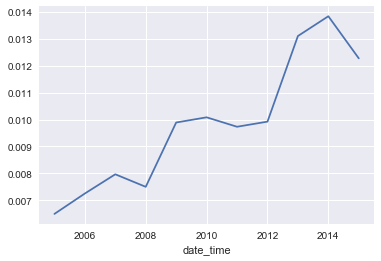

In [46]:
annual= df.drugs_related_stop.resample('A').mean()
annual.plot()

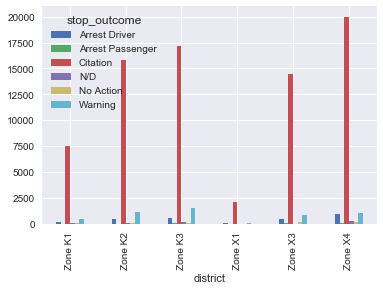

In [47]:
all_zones = pd.crosstab(df.district,df.stop_outcome)
all_zones.plot(kind='bar')
plt.show()

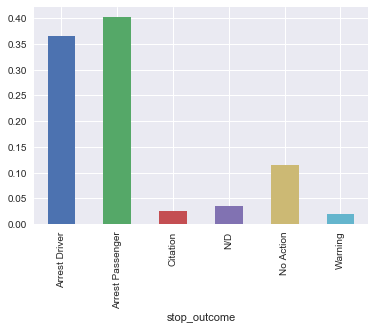

In [48]:
# the result of the search 
dd=df.groupby('stop_outcome').search_conducted.mean()
dd.plot(kind='bar')

In [49]:
#we should do more investigations in this area
all_zones = pd.crosstab(df.stop_duration,df.stop_outcome)
print(all_zones)

stop_outcome   Arrest Driver  Arrest Passenger  Citation  N/D  No Action  \
stop_duration                                                              
0-15 Min                 857                93     62988  514        329   
16-30 Min               1142               144     11819   75        241   
30+ Min                  736               106      2284   18         54   

stop_outcome   Warning  
stop_duration           
0-15 Min          4796  
16-30 Min          319  
30+ Min             21  


In [50]:
df.groupby(['district','driver_gender']).is_arrested.sum()

district  driver_gender
Zone K1   F                 48
          M                154
Zone K2   F                113
          M                431
Zone K3   F                133
          M                499
Zone X1   F                 10
          M                 45
Zone X3   F                132
          M                432
Zone X4   F                233
          M                848
Name: is_arrested, dtype: int64

In [51]:
df.groupby(['district','driver_race']).is_arrested.sum()

district  driver_race
Zone K1   Asian            2
          Black           40
          Hispanic        24
          Other            0
          White          136
Zone K2   Asian            5
          Black           95
          Hispanic        93
          Other            0
          White          351
Zone K3   Asian           11
          Black          147
          Hispanic        97
          Other            0
          White          377
Zone X1   Asian            0
          Black            8
          Hispanic        19
          Other            0
          White           28
Zone X3   Asian           12
          Black          153
          Hispanic       121
          Other            1
          White          277
Zone X4   Asian           16
          Black          326
          Hispanic       251
          Other            1
          White          487
Name: is_arrested, dtype: int64

In [52]:
df.search_type.value_counts()


nosearch                                                    83229
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Incident to Arrest,Inventory,Probable Cause                    35
Probable Cause,Protective Frisk                                35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

In [53]:
#we can do farther investication on that
df['inventory'] = df.search_type.str.contains('Inventory', na=False)
df.inventory.sum()
df.inventory.mean()

0.0050961449570121106

In [54]:
#13.3 % of searches included an inventory
searched = df[df.search_conducted == True]
searched.inventory.mean()

0.13335349259147264

In [55]:
# start some time related analisies
print(df.index)
# the data that we have is dtarting from 01/04/2005 : 12/31/2015 

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='date_time', length=86536, freq=None)


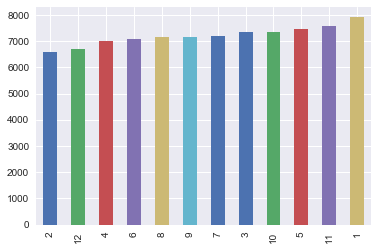

In [56]:
monthes =df.index.month.value_counts().sort_values()
monthes.plot(kind='bar')

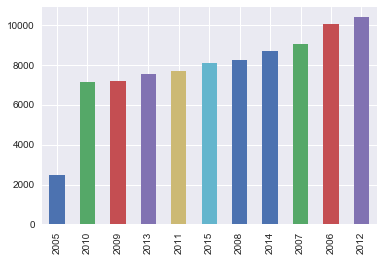

In [57]:
monthes =df.index.year.value_counts().sort_values()
monthes.plot(kind='bar')

In [58]:
df.groupby(df.index.month).is_arrested.sum().sort_values()

date_time
6     219
9     220
2     233
4     236
11    251
8     262
10    265
5     268
3     270
7     274
12    276
1     304
Name: is_arrested, dtype: int64

In [59]:
df.groupby(df.index.year).is_arrested.sum().sort_values()

date_time
2005    161
2013    225
2008    239
2015    249
2014    253
2010    278
2009    281
2011    283
2007    302
2012    348
2006    459
Name: is_arrested, dtype: int64

0.0355690117407784
date_time
5       8
4      12
6      43
7      57
3      64
19     79
18     80
21     85
17    105
8     108
20    120
16    125
12    130
13    140
15    146
9     162
2     163
14    163
11    165
22    166
10    200
23    247
0     248
1     262
Name: is_arrested, dtype: int64


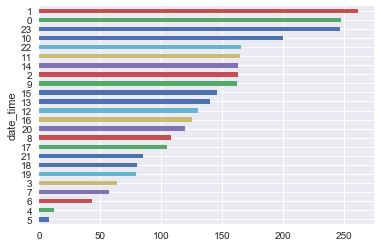

In [60]:
print(df.is_arrested.mean())
# which time the police is stop more people 
# Save the hourly arrest rate
hourly_arrest_rate = df.groupby(df.index.hour).is_arrested.sum().sort_values()
print(hourly_arrest_rate)
hourly_arrest_rate.plot(kind='barh')

date_time
2005-12-31   0.007
2006-12-31   0.007
2007-12-31   0.008
2008-12-31   0.008
2009-12-31   0.010
2010-12-31   0.010
2011-12-31   0.010
2012-12-31   0.010
2013-12-31   0.013
2014-12-31   0.014
2015-12-31   0.012
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


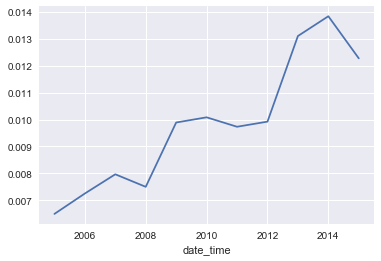

In [61]:
#so the arrested rate is highest in the night time --> 12,11,1 also moring time 10-11
# Calculate the annual rate of drug-related stops
print(df.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = df.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

#drug rate is the highest in the 2014

date_time
2005-12-31   0.049
2006-12-31   0.042
2007-12-31   0.044
2008-12-31   0.040
2009-12-31   0.050
2010-12-31   0.045
2011-12-31   0.036
2012-12-31   0.034
2013-12-31   0.030
2014-12-31   0.032
2015-12-31   0.028
Freq: A-DEC, Name: search_conducted, dtype: float64


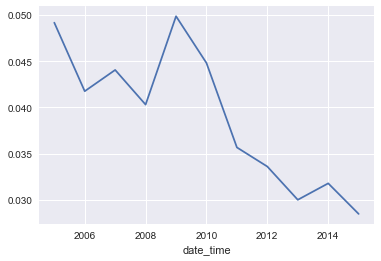

In [62]:
#so the arrested rate is highest in the night time --> 12,11,1 also moring time 10-11
# Calculate the annual rate of drug-related stops
print(df.search_conducted.resample('A').mean())

# Save the annual rate of drug-related stops
annual_search_rate = df.search_conducted.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_search_rate.plot()

# Display the plot
plt.show()

#drug rate is the highest in the 2014

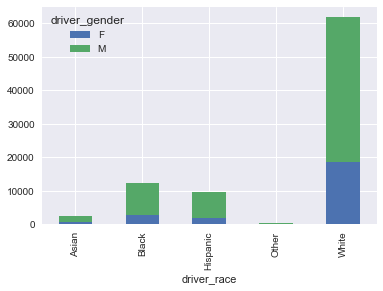

In [63]:
table = pd.crosstab(df.driver_race, df.driver_gender) 
table.plot(kind='bar', stacked=True)
plt.show()

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1      

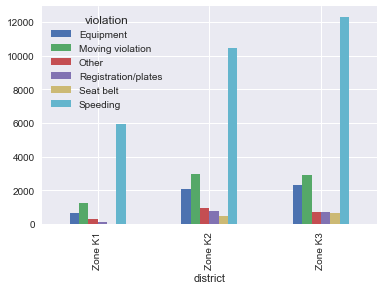

In [64]:
# Create a frequency table of districts and violations
print(pd.crosstab(df.district,df.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(df.district,df.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

In [65]:
# Print the unique values in 'stop_duration'
print(df.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
df['stop_minutes'] = df.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(df.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


violation_raw
APB                                17.967
Call for Service                   22.124
Equipment/Inspection Violation     11.446
Motorist Assist/Courtesy           17.741
Other Traffic Violation            13.844
Registration Violation             13.737
Seatbelt Violation                  9.663
Special Detail/Directed Patrol     15.124
Speeding                           10.582
Suspicious Person                  14.911
Violation of City/Town Ordinance   13.254
Warrant                            24.056
Name: stop_minutes, dtype: float64


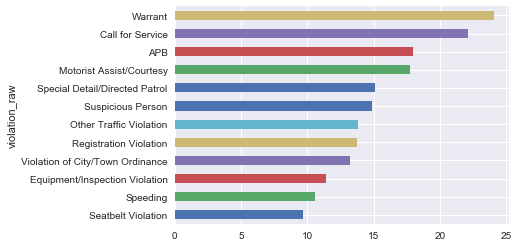

In [66]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(df.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = df.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()

In [67]:
search_rate = df.groupby('violation').search_conducted.mean() 

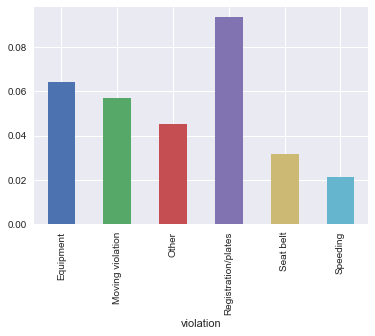

In [68]:
search_rate.plot(kind='bar')
plt.show()

In [69]:
# so now we are ready the weather database with data here and see the weather effect on the stops
weather = pd.read_csv('weather.csv')
print(weather.head())

       STATION        DATE   TAVG  TMIN  TMAX  AWND   WSF2  WT01  WT02  WT03  \
0  USW00014765  2005-01-01 44.000    35    53 8.950 25.100 1.000   nan   nan   
1  USW00014765  2005-01-02 36.000    28    44 9.400 14.100   nan   nan   nan   
2  USW00014765  2005-01-03 49.000    44    53 6.930 17.000 1.000   nan   nan   
3  USW00014765  2005-01-04 42.000    39    45 6.930 16.100 1.000   nan   nan   
4  USW00014765  2005-01-05 36.000    28    43 7.830 17.000 1.000   nan   nan   

   WT04  WT05  WT06  WT07  WT08  WT09  WT10  WT11  WT13  WT14  WT15  WT16  \
0   nan   nan   nan   nan   nan   nan   nan   nan 1.000   nan   nan   nan   
1   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan 1.000   
2   nan   nan   nan   nan   nan   nan   nan   nan 1.000   nan   nan 1.000   
3   nan   nan   nan   nan   nan   nan   nan   nan 1.000 1.000   nan 1.000   
4   nan   nan   nan   nan   nan   nan   nan   nan 1.000   nan   nan 1.000   

   WT17  WT18  WT19  WT21  WT22  
0   nan   nan   nan   

In [70]:
#so lets look at what the data mean here 
weather.STATION.value_counts()
weather.drop('STATION',axis=1)

,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,2005-01-01,44.000,35,53,8.950,25.100,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan
1,2005-01-02,36.000,28,44,9.400,14.100,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,1.000,nan,nan,nan
2,2005-01-03,49.000,44,53,6.930,17.000,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,1.000,nan,nan,nan,nan,nan
3,2005-01-04,42.000,39,45,6.930,16.100,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,1.000,nan,1.000,nan,nan,nan,nan,nan
4,2005-01-05,36.000,28,43,7.830,17.000,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,1.000,nan,1.000,nan,nan,nan
5,2005-01-06,30.000,25,35,8.720,15.000,1.000,nan,nan,1.000,nan,1.000,nan,nan,nan,nan,nan,1.000,1.000,1.000,1.000,1.000,1.000,nan,nan,nan
6,2005-01-07,33.000,28,37,8.720,23.900,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan
7,2005-01-08,32.000,29,34,6.040,17.000,1.000,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,1.000,1.000,nan,1.000,nan,1.000,nan,nan,nan
8,2005-01-09,31.000,28,34,6.040,15.000,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan,nan,1.000,nan,nan,nan
9,2005-01-10,37.000,31,43,6.710,17.000,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan,nan,1.000,nan,nan,nan


          TMIN     TAVG     TMAX
count 4017.000 1217.000 4017.000
mean    43.484   52.493   61.269
std     17.020   17.831   18.200
min     -5.000    6.000   15.000
25%     30.000   39.000   47.000
50%     44.000   54.000   62.000
75%     58.000   68.000   77.000
max     77.000   86.000  102.000


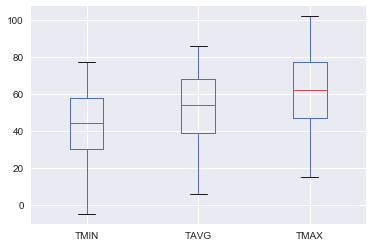

In [71]:
#TAVG,TMIN,TMAX ==> temp
#Wt01:wt22 ==> this is bad weather 
#AWND,Wsf2==> wind speed
# Describe the temperature columns
print(weather[["TMIN", "TAVG", "TMAX"]].describe())

# Create a box plot of the temperature columns
weather[["TMIN", "TAVG", "TMAX"]].plot(kind='box')

# Display the plot
plt.show()

In [72]:
#ask to see the realtionship between the stop_duration and the weather
df.stop_duration.unique() 
mapping = {'0-15 Min':'short', '16-30 Min':'medium', '30+ Min':'long'} 
df['stop_length'] = df.stop_duration.map(mapping) 


In [73]:
cats = ['short', 'medium', 'long'] 
df['stop_length'] = df.stop_length.astype('category', ordered=True,categories=cats) 

C:\Users\arsany\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  


In [74]:
df.stop_length.head()

date_time
2005-01-04 12:55:00     short
2005-01-23 23:15:00     short
2005-02-17 04:15:00     short
2005-02-20 17:15:00    medium
2005-02-24 01:20:00     short
Name: stop_length, dtype: category
Categories (3, object): [short < medium < long]

In [75]:
df['is_arrested'] = df.is_arrested.astype('int')
df.groupby('stop_length').is_arrested.mean()

stop_length
short    0.014
medium   0.094
long     0.262
Name: is_arrested, dtype: float64

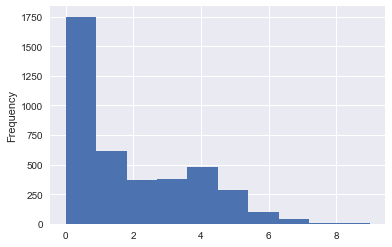

In [76]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:,'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist')

# Display the plot
plt.show()

In [77]:
# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad',  3:'bad', 4:'bad', 5:'worse', 6:'worse',7:'worse',8:'worse',9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather['rating'].value_counts())

bad      1836
good     1749
worse     432
Name: rating, dtype: int64


In [78]:
# Create a list of weather ratings in logical order
cats= ['good', 'bad', 'worse']

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype('category',ordered=True,categories=cats)

# Examine the head of 'rating'
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]


C:\Users\arsany\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """


In [79]:
# Reset the index of 'ri'
df.reset_index(inplace=True)

# Examine the head of 'ri'
print(df.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE' , 'rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

            date_time   stop_date stop_time driver_gender driver_race  \
0 2005-01-04 12:55:00  2005-01-04     12:55             M       White   
1 2005-01-23 23:15:00  2005-01-23     23:15             M       White   
2 2005-02-17 04:15:00  2005-02-17     04:15             M       White   
3 2005-02-20 17:15:00  2005-02-20     17:15             M       White   
4 2005-02-24 01:20:00  2005-02-24     01:20             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False    nosearch   
1                        Speeding   Speeding             False    nosearch   
2                        Speeding   Speeding             False    nosearch   
3                Call for Service      Other             False    nosearch   
4                        Speeding   Speeding             False    nosearch   

    stop_outcome  is_arrested stop_duration  drugs_related_stop district  \
0       Citation

In [82]:
date = type(df['date_time'])
df_weather = pd.merge(left=df, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(df_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
df_weather.set_index('date_time', inplace=True)

(86536, 19)


In [84]:
print(df_weather.is_arrested.mean())

0.0355690117407784


In [85]:
print(df_weather.groupby('rating').is_arrested.mean())

rating
good    0.034
bad     0.036
worse   0.042
Name: is_arrested, dtype: float64


In [89]:
arrest_rate = df_weather.groupby(['violation', 'rating']).is_arrested.mean()

In [90]:
print(arrest_rate.loc['Moving violation', 'bad'])

0.05804964058049641


In [92]:
print(arrest_rate.loc['Speeding'])

rating
good    0.013
bad     0.013
worse   0.017
Name: is_arrested, dtype: float64


In [ ]:
# start combining a weather data set in the same range of the stops and see if the police let the people go with no citaion if the weather is not good or now
# so at the end we will find that we start with some initial questions but we ened up finidng some interesting information like 
    - what type of cars that prefered by each race,gender and each district
    - where the places that there are more druges more weapons so we can define places are safe 
    - is some police offisers is raced to a race or a gender?
    - the weather is related to the stop or no?
    - which destrict is their police is more flexable ?
    - the age of people that doing druges in each district 
    - the popluation pattern for each distrect?
    - the age pattern for each distract ?
    